In [1]:
import os
try:
    inpath = "../input/data/" #Kaggle
    print(os.listdir(inpath))
except FileNotFoundError:
    inpath = "./" #Local
    print(os.listdir(inpath))

['images_003', 'images_012', 'LOG_CHESTXRAY.pdf', 'README_CHESTXRAY.pdf', 'BBox_List_2017.csv', 'images_009', 'images_008', 'images_007', 'test_list.txt', 'images_010', 'ARXIV_V5_CHESTXRAY.pdf', 'images_002', 'images_011', 'Data_Entry_2017.csv', 'images_001', 'train_val_list.txt', 'images_005', 'FAQ_CHESTXRAY.pdf', 'images_004', 'images_006']


In [2]:
import pandas as pd
data = pd.read_csv(inpath + 'Data_Entry_2017.csv')
print(f"The dimensions of the data set are:: {data.shape}")

data.head()

The dimensions of the data set are:: (112120, 12)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
"""
We read all the routes of the images
"""
from glob import glob
all_image_paths = {os.path.basename(x): x for x in 
                   glob(os.path.join('..', 'input','data','images*','images','*.png'))}
print('Images found:', len(all_image_paths))

"""
Add the path column to the dataset
"""
data['Path'] = data['Image Index'].map(all_image_paths.get)

data.sample(5, random_state=3)

Images found: 112120


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,Path
51465,00013002_007.png,No Finding,7,13002,65,F,PA,2814,2991,0.143,0.143,NaN,../input/data/images_006/images/00013002_007.png
52193,00013175_016.png,Infiltration,16,13175,28,M,PA,2554,2991,0.143,0.143,NaN,../input/data/images_006/images/00013175_016.png
106914,00028859_001.png,No Finding,1,28859,51,M,AP,3056,2544,0.139,0.139,NaN,../input/data/images_012/images/00028859_001.png
73948,00018187_009.png,No Finding,9,18187,32,F,AP,2500,2048,0.168,0.168,NaN,../input/data/images_008/images/00018187_009.png
8361,00002217_000.png,Atelectasis|Consolidation|Mass,0,2217,17,M,PA,2674,2393,0.143,0.143,NaN,../input/data/images_002/images/00002217_000.png


In [4]:
"""
Create a np array with all the single deseases
"""
import numpy as np
from itertools import chain
all_labels = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))

all_labels

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [5]:
all_labels = np.delete(all_labels, np.where(all_labels == 'No Finding'))
print(f'Current type: {type(all_labels)}')

all_labels = [x for x in all_labels]
print(f'Final type: {type(all_labels)}')

print(f'Diseases: ({len(all_labels)}): {all_labels}')

Current type: <class 'numpy.ndarray'>
Final type: <class 'list'>
Diseases: (14): ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia', 'Pneumothorax']


In [6]:
"""
We add a column, for each disease
"""
for c_label in all_labels:
    if len(c_label)>1: # leave out empty labels
        # Add a column for each desease
        data[c_label] = data['Finding Labels'].map(lambda finding: 1 if c_label in finding else 0)
        
print(f"The dimensions of the data set are: {data.shape}")
data.head()

The dimensions of the data set are: (112120, 27)


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,...,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,...,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,...,0,1,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,...,1,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,...,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,...,0,0,0,1,0,0,0,0,0,0


In [7]:
data = data.groupby('Finding Labels').filter(lambda x : len(x)>11)


In [8]:
from sklearn.model_selection import train_test_split

train_and_valid_df, test_df = train_test_split(data,
                                               test_size = 0.30,
                                               random_state = 2018,
                                              )

train_df, valid_df = train_test_split(train_and_valid_df,
                                      test_size=0.30,
                                      random_state=2018,
                                     )

print(f'Training : {train_df.shape[0]} Validation: {valid_df.shape[0]} Testing: {test_df.shape[0]}')

Training : 54099 Validation: 23186 Testing: 33123


In [9]:
from keras_preprocessing.image import ImageDataGenerator
base_generator = ImageDataGenerator(rescale=1./255)

In [10]:
IMG_SIZE = (224, 224)
def flow_from_dataframe(image_generator, dataframe, batch_size):

    df_gen = image_generator.flow_from_dataframe(dataframe,
                                                 x_col='Path',
                                                 y_col=all_labels,
                                                 target_size=IMG_SIZE,
                                                 classes=all_labels,
                                                 color_mode='rgb',
                                                 class_mode='raw',
                                                 shuffle=False,
                                                 batch_size=batch_size)
    
    return df_gen

In [11]:
train_gen = flow_from_dataframe(image_generator=base_generator, 
                                dataframe= train_df,
                                batch_size = 32)

valid_gen = flow_from_dataframe(image_generator=base_generator, 
                                dataframe=valid_df,
                                batch_size = 32)

test_gen = flow_from_dataframe(image_generator=base_generator, 
                               dataframe=test_df,
                               batch_size = 32)

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:220: UserWarning: `classes` will be ignored given the class_mode="raw"
  .format(self.class_mode))


Found 54099 validated image filenames.
Found 23186 validated image filenames.
Found 33123 validated image filenames.


In [12]:
train_x, train_y = next(train_gen)
print(f"Image dimensions: {train_x[1].shape}")
print(f"Diseases vector: {train_y[1]}")

Image dimensions: (224, 224, 3)
Diseases vector: [0 0 0 0 1 0 0 0 1 0 0 0 0 0]


In [13]:


from keras.layers import Input
from keras.applications.mobilenet import MobileNet
from keras.layers.core import Dense
from keras.models import Model

input_shape=(224, 224, 3)
img_input = Input(shape=input_shape)

base_model = MobileNet(include_top=False, input_tensor=img_input, input_shape=input_shape, 
                         pooling="avg", weights='imagenet')
x = base_model.output
predictions = Dense(len(all_labels), activation="sigmoid", name="predictions")(x)
model = Model(inputs=img_input, outputs=predictions)

17227776/17225924 [==============================] - 0s 0us/step


In [14]:
from contextlib import redirect_stdout

with open('model_summary.txt', 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [15]:
from keras.callbacks import ModelCheckpoint
model_train = model
output_weights_name='weights.h5'
checkpoint = ModelCheckpoint(
             output_weights_name,
             save_weights_only=True,
             save_best_only=True,
             verbose=1,
            )

In [16]:
import keras.backend as kb
from keras.callbacks import Callback
from sklearn.metrics import roc_auc_score
import shutil
import warnings
import json
class MultipleClassAUROC(Callback):
    """
    Monitor mean AUROC and update model
    """
    def __init__(self, generator, class_names, weights_path, stats=None):
        super(Callback, self).__init__()
        self.generator = generator
        self.class_names = class_names
        self.weights_path = weights_path
        self.best_weights_path = os.path.join(
            os.path.split(weights_path)[0],
            f"best_{os.path.split(weights_path)[1]}",
        )
        self.best_auroc_log_path = os.path.join(
            os.path.split(weights_path)[0],
            "best_auroc.log",
        )
        self.stats_output_path = os.path.join(
            os.path.split(weights_path)[0],
            ".training_stats.json"
        )
        # for resuming previous training
        if stats:
            self.stats = stats
        else:
            self.stats = {"best_mean_auroc": 0}

        # aurocs log
        self.aurocs = {}
        for c in self.class_names:
            self.aurocs[c] = []
    def on_epoch_end(self, epoch, logs={}):
        """
        Calculate the average of the ROC Curves and save the best group of weights
        according to this metric
        """
        print("\n*********************************")
        self.stats["lr"] = float(kb.eval(self.model.optimizer.lr))
        print(f"Learning Rate actual: {self.stats['lr']}")

        """
        y_hat shape: (#examples, len(labels))
        y: [(#examples, 1), (#examples, 1) ... (#examples, 1)]
        """
        y_hat = self.model.predict_generator(self.generator,steps=self.generator.n/self.generator.batch_size)
        y = self.generator.labels
        
        print(f"*** epoch#{epoch + 1} ROC Curves Training Phase ***")
        current_auroc = []
        for i in range(len(self.class_names)):
            try:
                score = roc_auc_score(y[:, i], y_hat[:, i])
            except ValueError:
                score = 0
            self.aurocs[self.class_names[i]].append(score)
            current_auroc.append(score)
            print(f"{i+1}. {self.class_names[i]}: {score}")
        print("*********************************")

        mean_auroc = np.mean(current_auroc)
        print(f"Average ROC Curves: {mean_auroc}")
        if mean_auroc > self.stats["best_mean_auroc"]:
            print(f"Update of the result of the ROC Curves of: {self.stats['best_mean_auroc']} a {mean_auroc}")
            # 1. copy best model
            shutil.copy(self.weights_path, self.best_weights_path)

            # 2. update log file
            print(f"Updating the log file: {self.best_auroc_log_path}")
            with open(self.best_auroc_log_path, "a") as f:
                f.write(f"(epoch#{epoch + 1}) auroc: {mean_auroc}, lr: {self.stats['lr']}\n")

            # 3. write stats output, this is used for resuming the training
            with open(self.stats_output_path, 'w') as f:
                json.dump(self.stats, f)

            print(f"Weight group update: {self.weights_path} -> {self.best_weights_path}")
            self.stats["best_mean_auroc"] = mean_auroc
            print("*********************************")
        return

In [17]:
training_stats = {}
auroc = MultipleClassAUROC(
    generator=valid_gen,
    class_names=all_labels,
    weights_path=output_weights_name,
    stats=training_stats
)

In [18]:
from keras.optimizers import Adam
initial_learning_rate=1e-3
optimizer = Adam(lr=initial_learning_rate)
model_train.compile(optimizer=optimizer, loss="binary_crossentropy")

In [19]:
from keras.callbacks import TensorBoard, ReduceLROnPlateau
#TODO - VALIDATE THE LOGS OUTPUT
logs_base_dir = '../working/'
patience_reduce_lr=2
min_lr=1e-8
callbacks = [
            checkpoint,
            TensorBoard(log_dir=os.path.join(logs_base_dir, "logs"), batch_size=train_gen.batch_size),
            ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience_reduce_lr,
                              verbose=1, mode="min", min_lr=min_lr),
            auroc,
        ]

In [20]:
epochs=5
fit_history = model.fit_generator( 
    generator=train_gen,   
    steps_per_epoch=50,
    epochs=epochs, 
    validation_data=valid_gen,
    validation_steps=50, 
    callbacks=callbacks,
    shuffle=False                       
)   

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 0.2123
Epoch 00001: val_loss improved from inf to 0.58274, saving model to weights.h5

*********************************
Learning Rate actual: 0.0010000000474974513
*** epoch#1 ROC Curves Training Phase ***
1. Atelectasis: 0.6550160595934644
2. Cardiomegaly: 0.6603344902937158
3. Consolidation: 0.46259597236657923
4. Edema: 0.7949574175276239
5. Effusion: 0.737576158038155
6. Emphysema: 0.526750771956273
7. Fibrosis: 0.5555715656939757
8. Hernia: 0.5359200775035944
9. Infiltration: 0.6046105880831308
10. Mass: 0.5784991186858772
11. Nodule: 0.5788598439695044
12. Pleural_Thickening: 0.5999648572084357
13. Pneumonia: 0.5813166198929103
14. Pneumothorax: 0.5960534526787349
*********************************
Average ROC Curves: 0.6048590709637125
Update of the result of the ROC Curves of: 0 a 0.6048590709637125
Updating the log file: best_auroc.log
Weight group update: weights.h5 -> best_weights.h5
*************************

In [21]:
# serialize model to JSON                                           
model_json = model.to_json()                            
with open("model.json", "w") as json_file:                                                                                                                                                                          
    json_file.write(model_json)                                                                    
# serialize weights to HDF5       
model.save_weights("model-w.h5")                                                                  
print("Saved model to disk")                                        

Saved model to disk


In [22]:
model.save("model.h5")     
print("Saved model to disk")      

Saved model to disk


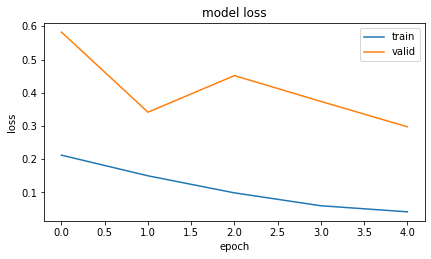

In [23]:
import matplotlib.pyplot as plt  


plt.figure(1, figsize = (15,8))  
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])           
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [24]:
fit_history.history.keys()


dict_keys(['loss', 'val_loss', 'lr'])

In [25]:
model.load_weights('model-w.h5')


In [26]:
pred_y = model.predict_generator(test_gen, steps=test_gen.n/test_gen.batch_size, verbose = True)

1036/1035 [==============================] - 1360s 1s/step


In [27]:
test_gen.reset()
test_x, test_y = next(test_gen)  
print(f"Diseases vector: {test_y[1]}")
print(f"Prediction product vector: {pred_y[2]}")

Diseases vector: [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Prediction product vector: [5.0683886e-02 6.1005652e-01 6.0665607e-02 1.7900765e-03 1.3231698e-01
 1.1772811e-02 3.3469200e-03 1.4450878e-02 3.5470724e-04 5.7770938e-02
 3.8233399e-03 2.9847026e-04 9.6642971e-04 1.3259053e-04]


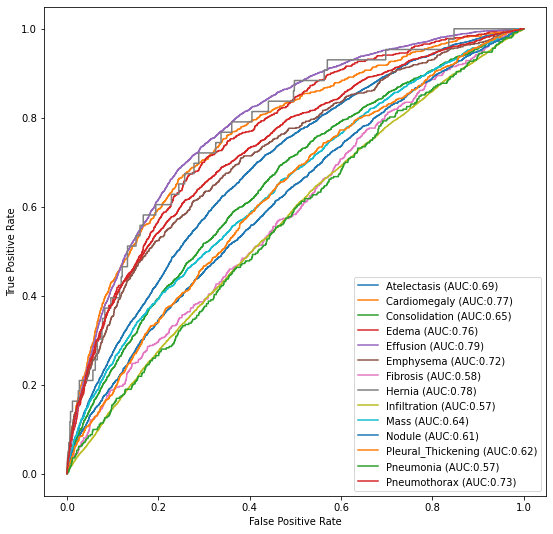

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
test_gen.reset()
test_x, test_y = next(test_gen)
# Space
fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
for (idx, c_label) in enumerate(all_labels):
    #Points to graph
    fpr, tpr, thresholds = roc_curve(test_gen.labels[:,idx].astype(int), pred_y[:,idx])
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    
#convention
c_ax.legend()

#Labels  
c_ax.set_xlabel('False Positive Rate') 
c_ax.set_ylabel('True Positive Rate')

# Save as a png
fig.savefig('VGG16-Vital.png')       

In [29]:
from sklearn.metrics import roc_auc_score
# ROC AUC
auc = roc_auc_score(test_gen.labels, pred_y)
print('ROC AUC: %f' % auc)

ROC AUC: 0.677160
